In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/cardio_train.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df.head()





,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [5]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.384676
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.729725
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.983588
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,28.440955
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,25.282570


## Insulin


In [6]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['Insulin'] = np.random.randint(0, 847, size=len(df))


## Pregnancies



In [7]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['Pregnancies'] = np.random.randint(0, 17, size=len(df))


## glucose



In [8]:
# Définir une fonction pour générer des valeurs aléatoires en fonction de la catégorie
def generer_valeur_aleatoire(categorie):
    if categorie == 1:
        return np.random.randint(0, 100)
    elif categorie == 2:
        return np.random.randint(100, 126)
    elif categorie == 3:
        return np.random.randint(125, 200)

# Appliquer la fonction à la colonne "Glucose_categories"
df['Glucose_categories'] = df['gluc'].apply(generer_valeur_aleatoire)

In [9]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Insulin,Pregnancies,Glucose_categories
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,598,10,8
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,360,9,34
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,390,4,56
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,262,15,35
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,590,10,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,401,6,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,164,6,104
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,698,6,15
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,77,8,116


## DiabetesPedigreeFunction




In [10]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['DiabetesPedigreeFunction'] = np.random.randint(0.078, 2.42, size=len(df))

## SkinThickness

In [11]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['SkinThickness'] = np.random.randint(0, 99, size=len(df))

In [12]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Insulin,Pregnancies,Glucose_categories,DiabetesPedigreeFunction,SkinThickness
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,598,10,8,0,8
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,360,9,34,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,390,4,56,0,84
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,262,15,35,1,91
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,590,10,22,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,401,6,52,0,85
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,164,6,104,1,91
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,698,6,15,0,29
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,77,8,116,1,26


## BloodPressure

In [13]:
df['BloodPressure'] =df['ap_lo']

In [14]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Insulin,Pregnancies,Glucose_categories,DiabetesPedigreeFunction,SkinThickness,BloodPressure
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,598,10,8,0,8,80
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,360,9,34,1,1,90
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,390,4,56,0,84,70
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,262,15,35,1,91,100
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,590,10,22,0,26,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,401,6,52,0,85,80
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,164,6,104,1,91,90
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,698,6,15,0,29,90
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,77,8,116,1,26,80


In [15]:

df.rename(columns={'age': 'Age'}, inplace=True)
df.rename(columns={'Glucose_categories': 'Glucose'}, inplace=True)

In [18]:
import joblib

# Load the trained model
model = joblib.load('knnmodele.pkl')

# Extract the relevant features from your DataFrame
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Make predictions
predictions = model.predict(features)

# Add the predictions as a new column to your DataFrame
df['Diabetes'] = predictions

# Display the updated DataFrame
print(df)


          id    Age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  ...  active  cardio      

In [22]:
import joblib

# Load the trained model
model = joblib.load('LogisticRegressionmodele.pkl')

# Extract the relevant features from your DataFrame
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Make predictions
predictions = model.predict(features)

# Add the predictions as a new column to your DataFrame
df['Diabetes'] = predictions

# Display the updated DataFrame
print(df)


          id    Age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  ...  active  cardio      

C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [23]:
tall=df['Diabetes']== 0
tall

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: Diabetes, Length: 70000, dtype: bool

In [24]:
tall=len(df['Diabetes']== 1)
tall

70000

In [25]:
tall=len(df['Diabetes']== 0)
tall

70000

In [26]:
count_diabetes_positive = len(df[df['Diabetes'] == 1])
print("Number of rows with Diabetes equal to 1:", count_diabetes_positive)

Number of rows with Diabetes equal to 1: 70000


In [27]:
count_diabetes_positive = len(df[df['Diabetes'] == 0])
print("Number of rows with Diabetes equal to 1:", count_diabetes_positive)

Number of rows with Diabetes equal to 1: 0


In [50]:
#drop id
#df = df.drop('id', axis=1)

# print(df)
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
len(df)

60142

In [51]:
df[df['ap_lo']> df['ap_hi']].shape[0]
df['Age'] = (df['Age'] / 365).round().astype('int')

print(df.head())

   id  Age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   52       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   48       1     156    56.0    100     60            1     1      0   

   ...  active  cardio        BMI  Insulin  Pregnancies  Glucose  \
0  ...       1       0  21.967120      242            8       36   
1  ...       1       1  34.927679      348           11       28   
2  ...       0       1  23.507805      521            5       47   
3  ...       1       1  28.710479      636            4        0   
4  ...       0       0  23.011177      444           12       88   

   DiabetesPedigreeFunction  SkinThickness  BloodPressure  Diabetes  
0                         0             66          

In [53]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
df['age_group'] = pd.cut(df['Age'], bins=7, labels=range(7), include_lowest=True,right=True)
df.head()


,id,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,cardio,BMI,Insulin,Pregnancies,Glucose,DiabetesPedigreeFunction,SkinThickness,BloodPressure,Diabetes,age_group
0,0,50,2,168,62.0,110,80,1,1,0,...,0,21.967120,242,8,36,0,66,80,0,3
1,1,55,1,156,85.0,140,90,3,1,0,...,1,34.927679,348,11,28,0,29,90,0,4
2,2,52,1,165,64.0,130,70,3,1,0,...,1,23.507805,521,5,47,1,56,70,0,4
3,3,48,2,169,82.0,150,100,1,1,0,...,1,28.710479,636,4,0,1,23,100,0,3
4,4,48,1,156,56.0,100,60,1,1,0,...,0,23.011177,444,12,88,1,12,60,0,3


In [54]:
bmiMin = int(df['BMI'].min())
bmiMax = int(df['BMI'].max())

print(bmiMin, bmiMax)

df['BMI'] = pd.cut(df['BMI'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()


df["BMI"].value_counts(normalize=True)

16 46


1    0.461325
2    0.330202
3    0.133068
0    0.038193
4    0.033554
5    0.003658
Name: BMI, dtype: float64

In [55]:
df['map'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

mapMin = int(df['map'].min())
mapMax = int(df['map'].max())

print(mapMin, mapMax)

df['map'] = pd.cut(df['map'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()

73 121


,id,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,BMI,Insulin,Pregnancies,Glucose,DiabetesPedigreeFunction,SkinThickness,BloodPressure,Diabetes,age_group,map
0,0,50,2,168,62.0,110,80,1,1,0,...,1,242,8,36,0,66,80,0,3,2
1,1,55,1,156,85.0,140,90,3,1,0,...,3,348,11,28,0,29,90,0,4,4
2,2,52,1,165,64.0,130,70,3,1,0,...,1,521,5,47,1,56,70,0,4,2
3,3,48,2,169,82.0,150,100,1,1,0,...,2,636,4,0,1,23,100,0,3,5
4,4,48,1,156,56.0,100,60,1,1,0,...,1,444,12,88,1,12,60,0,3,0


Print Null rows

In [56]:
null_rows = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [id, Age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, BMI, Insulin, Pregnancies, Glucose, DiabetesPedigreeFunction, SkinThickness, BloodPressure, Diabetes, age_group, map]
Index: []

[0 rows x 23 columns]


In [57]:
df_og=df

df=df.drop(['height','weight','ap_hi','ap_lo','Age'],axis=1)

df.head()

,id,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,Insulin,Pregnancies,Glucose,DiabetesPedigreeFunction,SkinThickness,BloodPressure,Diabetes,age_group,map
0,0,2,1,1,0,0,1,0,1,242,8,36,0,66,80,0,3,2
1,1,1,3,1,0,0,1,1,3,348,11,28,0,29,90,0,4,4
2,2,1,3,1,0,0,0,1,1,521,5,47,1,56,70,0,4,2
3,3,2,1,1,0,0,1,1,2,636,4,0,1,23,100,0,3,5
4,4,1,1,1,0,0,0,0,1,444,12,88,1,12,60,0,3,0


gender	cholesterol	gluc	smoke	alco	active	cardio	age_group	bmi	map

In [59]:
df_og=df

df=df.drop(['id','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'] ,axis=1)

df.head()


,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,Diabetes,age_group,map
0,2,1,1,0,0,1,0,1,0,3,2
1,1,3,1,0,0,1,1,3,0,4,4
2,1,3,1,0,0,0,1,1,0,4,2
3,2,1,1,0,0,1,1,2,0,3,5
4,1,1,1,0,0,0,0,1,0,3,0


**Label Encoder**

In [60]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,Diabetes,age_group,map
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.0,60142.000000,60142.000000
mean,0.347311,0.350953,0.220229,0.085631,0.051877,0.803648,0.488228,1.673440,0.0,4.042233,2.359449
std,0.476120,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,0.898707,0.0,1.377070,1.186906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,3.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.0,4.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.0,5.000000,3.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.0,6.000000,5.000000


# **Clustering**

Clustering is used in machine learning to find similarities between data by grouping.  The most common technique for clustering is K-means. However, it is not effective for categorical data. K-means uses a Euclidean distance measure differences between data points. For our data, we have used **K-modes** which is the appropriate clustering algorithm for categorical data because it uses mode-based distance between the categories, so it is more suitable for categorical data. To find the optimal number of clusters, we have utilized the **elbow curve method**. 

In [61]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

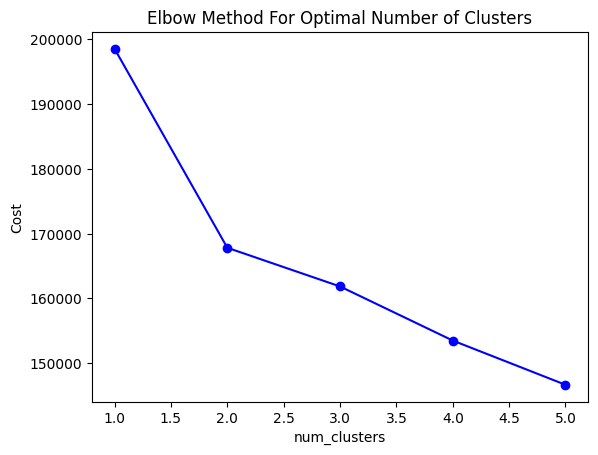

In [62]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [63]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
clusters

array([1, 0, 0, ..., 0, 0, 1], dtype=uint16)

In [64]:
df.insert(0,"clusters",clusters,True)

df.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,Diabetes,age_group,map
0,1,1,0,0,0,0,1,0,1,0,3,2
1,0,0,2,0,0,0,1,1,3,0,4,4
2,0,0,2,0,0,0,0,1,1,0,4,2
3,0,1,0,0,0,0,1,1,2,0,3,5
4,1,0,0,0,0,0,0,0,1,0,3,0


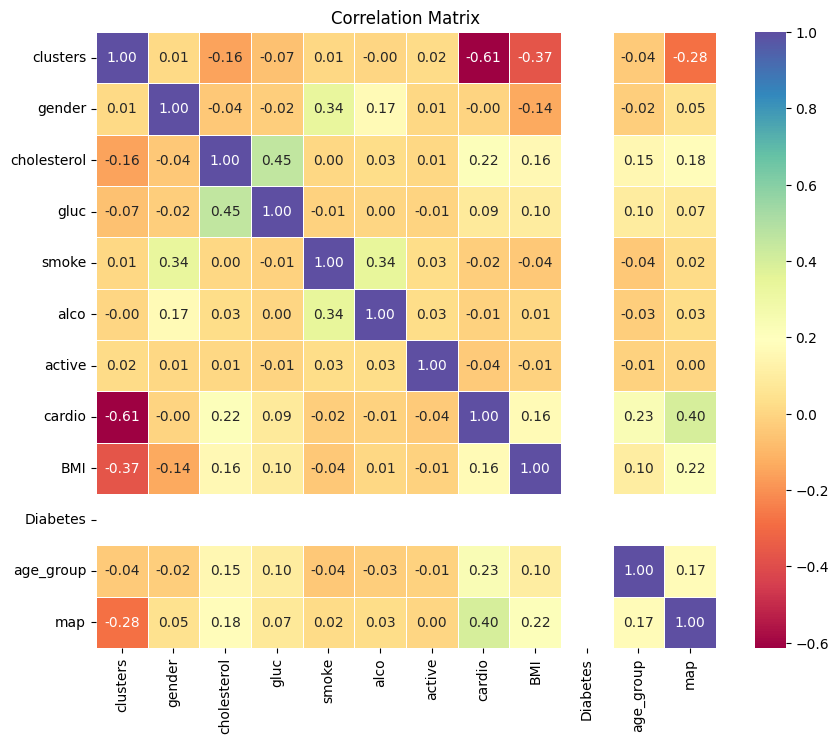

In [65]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

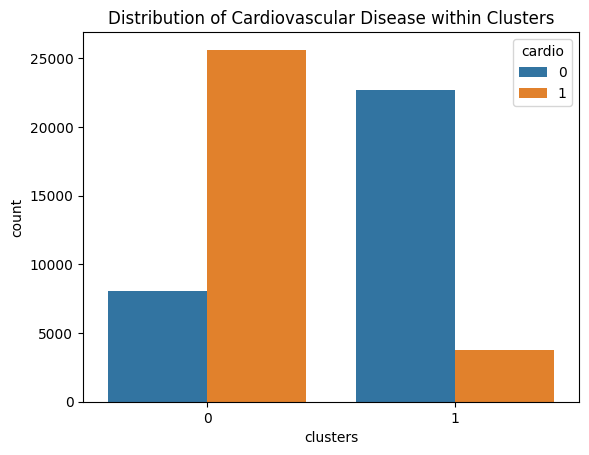

In [66]:
sns.countplot(x='clusters', hue='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()


In [67]:
x = df.drop(['cardio','gender','alco'], axis=1)
y = df['cardio']
x.head()

,clusters,cholesterol,gluc,smoke,active,BMI,Diabetes,age_group,map
0,1,0,0,0,1,1,0,3,2
1,0,2,0,0,1,3,0,4,4
2,0,2,0,0,0,1,0,4,2
3,0,0,0,0,1,2,0,3,5
4,1,0,0,0,0,1,0,3,0


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [69]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48113 entries, 20655 to 38356
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     48113 non-null  uint16
 1   cholesterol  48113 non-null  int64 
 2   gluc         48113 non-null  int64 
 3   smoke        48113 non-null  int64 
 4   active       48113 non-null  int64 
 5   BMI          48113 non-null  int64 
 6   Diabetes     48113 non-null  int64 
 7   age_group    48113 non-null  int64 
 8   map          48113 non-null  int64 
dtypes: int64(8), uint16(1)
memory usage: 3.4 MB


# **Random Forest**

Without CV


In [70]:
# build the model
rfModel = RandomForestClassifier(random_state=1)

# Fit the model
rfModel.fit(x_train, y_train)

# Make predictions
rf_pred = rfModel.predict(x_test)

# accuracy
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)*100
print(f"Accuracy without CV: {rf_accuracy:.2f}")

Accuracy without CV: 87.90


GridsearchCV
cross-validation technique that finds the optimal parameter values for a model

Original *param_grid* processed on faster machine:
> param_grid = {
>      'n_estimators': [100, 200, 300, 500],
>      'max_depth': [None, 10, 20, 30],
>      'min_samples_split': [2, 5, 10, 20],
>      'min_samples_leaf': [1, 2, 4, 8],
>      'max_features': ['sqrt', 'log2', None],
>  }
> 

> Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

In [71]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

#  Best parameters for RF
rf_best_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': [None],
}

# Create grid search
rf_gridsearch = GridSearchCV(estimator=rfModel,param_grid=rf_best_params, cv=5, scoring='accuracy',n_jobs=-1)

# Fit grid search
rf_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [10],
                         'n_estimators': [100]},
             scoring='accuracy')

Get Best parameters and best estimator for RF from GridSearchCV

In [72]:
best_params = rf_gridsearch.best_params_
best_estimator = rf_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")

Best Parameters : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator  : RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10,
                       random_state=1)


In [73]:
rf_pred_CV = best_estimator.predict(x_test)

Accuracy

In [74]:
rf_accuracy_cv = metrics.accuracy_score(y_test, rf_pred_CV)*100
print(f"Best Accuracy: {rf_accuracy_cv:.2f}")

Best Accuracy: 88.09


**Random Forest** Accuracy Scores

In [75]:
print(f"Random Forest accuracy without CV : {rf_accuracy:.2f}")
print(f"Random Forest accuracy with CV    : {rf_accuracy_cv:.2f}")

Random Forest accuracy without CV : 87.90
Random Forest accuracy with CV    : 88.09


**Classification Report**

In [76]:
classification_report_str = classification_report(y_test, rf_pred_CV, digits=4)

print("Classification Report for RF with CV:\n", classification_report_str)

Classification Report for RF with CV:
               precision    recall  f1-score   support

           0     0.8710    0.9034    0.8869      6220
           1     0.8923    0.8568    0.8742      5809

    accuracy                         0.8809     12029
   macro avg     0.8816    0.8801    0.8805     12029
weighted avg     0.8813    0.8809    0.8807     12029



# **MLP**

Without CV

In [77]:
# build MLP modelWithout CV
mlpModel = MLPClassifier(random_state=1)

# Fit the model
mlpModel.fit(x_train, y_train)

# Make predictions
mlp_pred = mlpModel.predict(x_test)

# accuracy
mlp_accuracy = metrics.accuracy_score(y_test, mlp_pred)*100
print(f"Accuracy without CV: {mlp_accuracy:.2f}")

Accuracy without CV: 87.92


C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [78]:
# mlp_params = {
#     'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam'],
#     'max_iter': [100, 200, 300],
#     'alpha': [0.0001, 0.001, 0.01],
# }

# Best parameters for MLP
mlp_best_params = {
    'activation': ['tanh'],
    'alpha': [0.01],
    'hidden_layer_sizes': [(50, 50)],
    'max_iter': [300],
    'solver': ['adam'],
}

# Create grid search
mlp_gridsearch = GridSearchCV(estimator=mlpModel, param_grid=mlp_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
mlp_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.01],
                         'hidden_layer_sizes': [(50, 50)], 'max_iter': [300],
                         'solver': ['adam']},
             scoring='accuracy')

Get Best parameters and best estimator for MLP from GridSearchCV

In [79]:
# mlp_best_params = mlp_gridsearch.best_params_
mlp_best_estimator = mlp_gridsearch.best_estimator_

print(f"Best Parameters : {mlp_best_params}")
print(f"Best Estimator  : {mlp_best_estimator}")

Best Parameters : {'activation': ['tanh'], 'alpha': [0.01], 'hidden_layer_sizes': [(50, 50)], 'max_iter': [300], 'solver': ['adam']}
Best Estimator  : MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50),
              max_iter=300, random_state=1)


Make prediction using best estimator

In [80]:
mlp_pred_CV = mlp_best_estimator.predict(x_test)

In [81]:
mlp_accuracy_cv = metrics.accuracy_score(y_test, mlp_pred_CV)*100
print(f"Best Accuracy: {mlp_accuracy_cv:.2f}")

Best Accuracy: 88.00


**MLP** Accuracy Scores

In [82]:
print(f"MLP accuracy without CV : {mlp_accuracy:.2f}")
print(f"MLP accuracy with CV    : {mlp_accuracy_cv:.2f}")

MLP accuracy without CV : 87.92
MLP accuracy with CV    : 88.00


**Classification Report**

In [83]:
classification_report_str = classification_report(y_test, mlp_pred_CV, digits=4)

print("Classification Report for MLP with CV:\n", classification_report_str)

Classification Report for MLP with CV:
               precision    recall  f1-score   support

           0     0.8742    0.8971    0.8855      6220
           1     0.8866    0.8618    0.8740      5809

    accuracy                         0.8800     12029
   macro avg     0.8804    0.8794    0.8798     12029
weighted avg     0.8802    0.8800    0.8800     12029



# **SVM**

Without CV

In [84]:
#Without CV build SVM model
svmModel = SVC(random_state=1)

# Fit the model
svmModel.fit(x_train, y_train)

# Make predictions
svm_pred = mlpModel.predict(x_test)

# accuracy
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)*100
print(f"Accuracy without CV: {svm_accuracy:.2f}")

Accuracy without CV: 87.92


In [85]:

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

svm_best_params = {
    'C': [10],
    'kernel': ['rbf'],
    'gamma': ['auto'],
}

# Create grid search
svm_gridsearch = GridSearchCV(estimator=svmModel, param_grid=svm_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
svm_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [10], 'gamma': ['auto'], 'kernel': ['rbf']},
             scoring='accuracy')

Get Best parameters and best estimator for SVM from GridSearchCV

In [86]:
svm_best_params = svm_gridsearch.best_params_
svm_best_estimator = svm_gridsearch.best_estimator_

print(f"Best Parameters : {svm_best_params}")
print(f"Best Estimator  : {svm_best_estimator}")

Best Parameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator  : SVC(C=10, gamma='auto', random_state=1)


Make prediction using best estimator

In [87]:
svm_pred_CV = svm_best_estimator.predict(x_test)

Accuracy

In [88]:
svm_accuracy_cv = metrics.accuracy_score(y_test, svm_pred_CV)*100
print(f"Best Accuracy: {svm_accuracy_cv:.2f}")

Best Accuracy: 88.08


**SVM** Accuracy Scores

In [89]:
print(f"SVM accuracy without CV : {svm_accuracy:.2f}")
print(f"SVM accuracy with CV    : {svm_accuracy_cv:.2f}")

SVM accuracy without CV : 87.92
SVM accuracy with CV    : 88.08


**Classification Report**

In [103]:
classification_report_str = classification_report(y_test, svm_pred_CV, digits=4)

print("Classification Report for SVM with CV:\n", classification_report_str)

Classification Report for SVM with CV:
               precision    recall  f1-score   support

           0     0.8726    0.9010    0.8866      6220
           1     0.8901    0.8592    0.8744      5809

    accuracy                         0.8808     12029
   macro avg     0.8814    0.8801    0.8805     12029
weighted avg     0.8811    0.8808    0.8807     12029



**KNN**

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Créer un modèle KNN
knnModel = KNeighborsClassifier()

# Adapter le modèle aux données d'entraînement
knnModel.fit(x_train, y_train)

# Faire des prédictions
knn_pred = knnModel.predict(x_test)

# Calculer l'exactitude
knn_accuracy = metrics.accuracy_score(y_test, knn_pred) * 100
print(f"Précision sans validation croisée : {knn_accuracy:.2f}")


Précision sans validation croisée : 86.36


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

knn_best_params = {
    'n_neighbors': [5],
    'weights': ['uniform'],
    'algorithm': ['auto'],
}

# Créer la recherche sur grille (grid search)
knn_gridsearch = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Ajuster la recherche sur grille aux données d'entraînement
knn_gridsearch.fit(x_train, y_train)

# Obtenir les meilleurs paramètres
best_params = knn_gridsearch.best_params_
print("Meilleurs paramètres:", best_params)


Meilleurs paramètres: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


In [93]:
knn_best_estimator = knn_gridsearch.best_estimator_

In [94]:
Kn_pred_CV = knn_best_estimator.predict(x_test)

Accuracy

In [95]:
knn_accuracy_cv = metrics.accuracy_score(y_test, Kn_pred_CV)*100
print(f"Best Accuracy: {knn_accuracy_cv:.2f}")

Best Accuracy: 86.36


**KNN** Accuracy Scores

In [96]:
print(f"Knn accuracy without CV : {knn_accuracy:.2f}")
print(f"Knn accuracy with CV    : {knn_accuracy_cv:.2f}")

Knn accuracy without CV : 86.36
Knn accuracy with CV    : 86.36


**Classification Report**

In [104]:
classification_report_str = classification_report(y_test, Kn_pred_CV, digits=4)

print("Classification Report for SVM with CV:\n", classification_report_str)

Classification Report for SVM with CV:
               precision    recall  f1-score   support

           0     0.8886    0.8416    0.8645      6220
           1     0.8395    0.8871    0.8626      5809

    accuracy                         0.8636     12029
   macro avg     0.8641    0.8644    0.8636     12029
weighted avg     0.8649    0.8636    0.8636     12029



**Arbre de décision**

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Créer un modèle d'arbre de décision
treeModel = DecisionTreeClassifier(random_state=1)

# Adapter le modèle aux données d'entraînement
treeModel.fit(x_train, y_train)

# Faire des prédictions
tree_pred = treeModel.predict(x_test)

# Calculer l'exactitude
tree_accuracy = metrics.accuracy_score(y_test, tree_pred) * 100
print(f"Précision sans validation croisée : {tree_accuracy:.2f}")


Précision sans validation croisée : 87.84


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres pour l'arbre de décision
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Créer un modèle d'arbre de décision
tree_model = DecisionTreeClassifier(random_state=1)

# Créer une instance de GridSearchCV
tree_gridsearch = GridSearchCV(estimator=tree_model, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajuster GridSearchCV aux données d'entraînement
tree_gridsearch.fit(x_train, y_train)

# Obtenir les meilleurs paramètres
best_params = tree_gridsearch.best_params_
print("Meilleurs paramètres:", best_params)


Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [99]:

tree_best_estimator = tree_gridsearch.best_estimator_

print(f"Best Parameters : {svm_best_params}")
print(f"Best Estimator  : {svm_best_estimator}")

Best Parameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator  : SVC(C=10, gamma='auto', random_state=1)


In [100]:
tree_pred_CV = tree_best_estimator.predict(x_test)

In [101]:
tree_accuracy_cv = metrics.accuracy_score(y_test, tree_pred_CV)*100
print(f"Best Accuracy: {tree_accuracy_cv:.2f}")

Best Accuracy: 87.99


In [102]:
print(f"tree accuracy without CV : {tree_accuracy:.2f}")
print(f"tree accuracy with CV    : {tree_accuracy_cv:.2f}")

tree accuracy without CV : 87.84
tree accuracy with CV    : 87.99


**Classification Report**

In [105]:
classification_report_str = classification_report(y_test, tree_pred_CV, digits=4)

print("Classification Report for SVM with CV:\n", classification_report_str)

Classification Report for SVM with CV:
               precision    recall  f1-score   support

           0     0.8690    0.9040    0.8861      6220
           1     0.8926    0.8540    0.8729      5809

    accuracy                         0.8799     12029
   macro avg     0.8808    0.8790    0.8795     12029
weighted avg     0.8804    0.8799    0.8797     12029



**Accuracy of all three models**

In [106]:
print(f"RF accuracy with CV    : {rf_accuracy_cv:.2f}")
print(f"MLP accuracy with CV   : {mlp_accuracy_cv:.2f}")
print(f"SVM accuracy with CV   : {svm_accuracy_cv:.2f}")
print(f"Knn accuracy with CV   : {knn_accuracy_cv:.2f}")
print(f"Tree accuracy with CV   : {tree_accuracy_cv:.2f}")

RF accuracy with CV    : 88.09
MLP accuracy with CV   : 88.00
SVM accuracy with CV   : 88.08
Knn accuracy with CV   : 86.36
Tree accuracy with CV   : 87.99


**Visualization**

Text(0.5, 427.9555555555555, 'Predicted label')

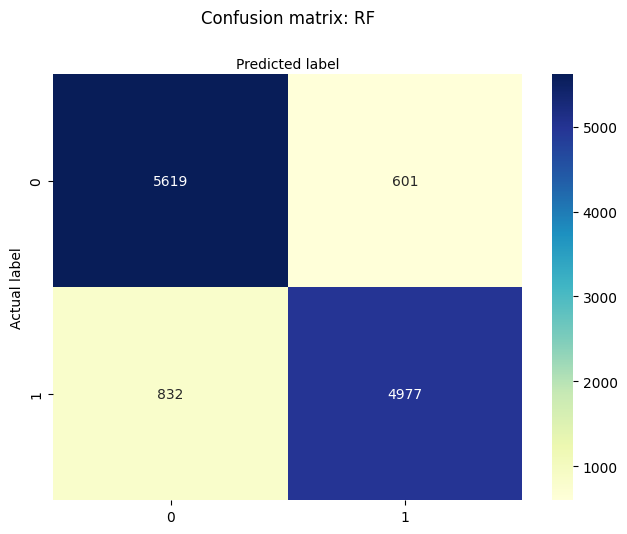

In [107]:
cnf_matrix = metrics.confusion_matrix(y_test, rf_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

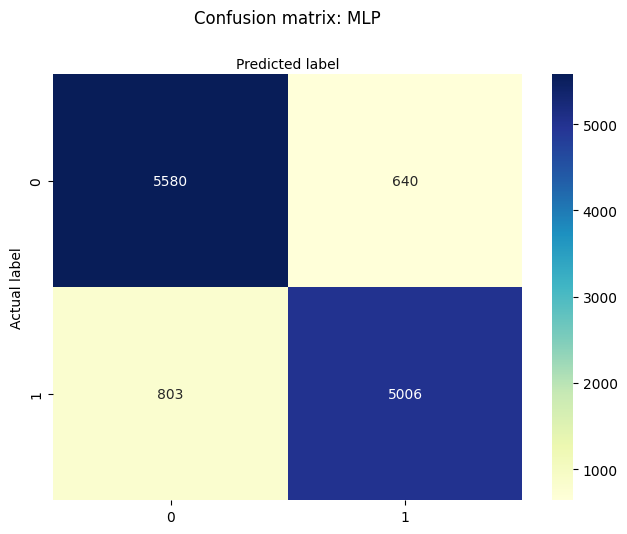

In [108]:
cnf_matrix = metrics.confusion_matrix(y_test, mlp_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

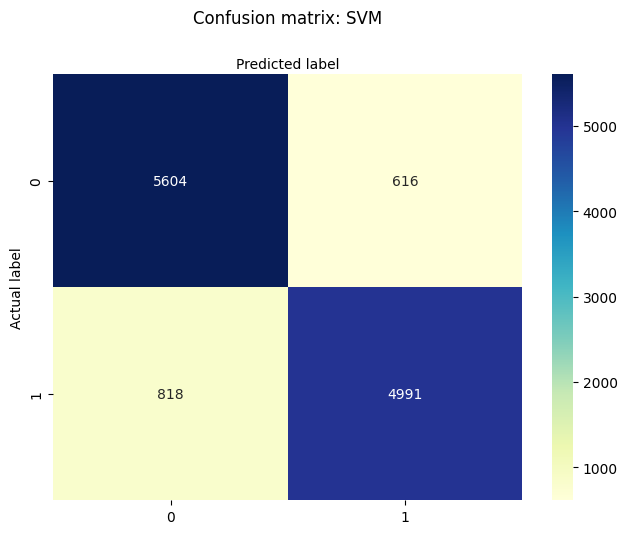

In [109]:
cnf_matrix = metrics.confusion_matrix(y_test, svm_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

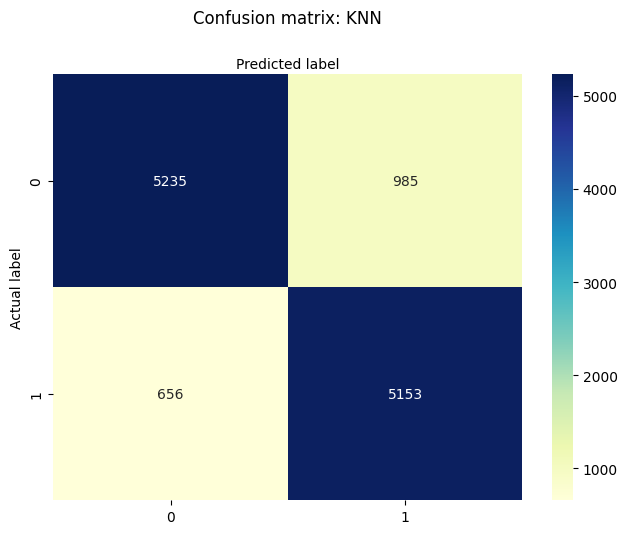

In [112]:
cnf_matrix = metrics.confusion_matrix(y_test, Kn_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

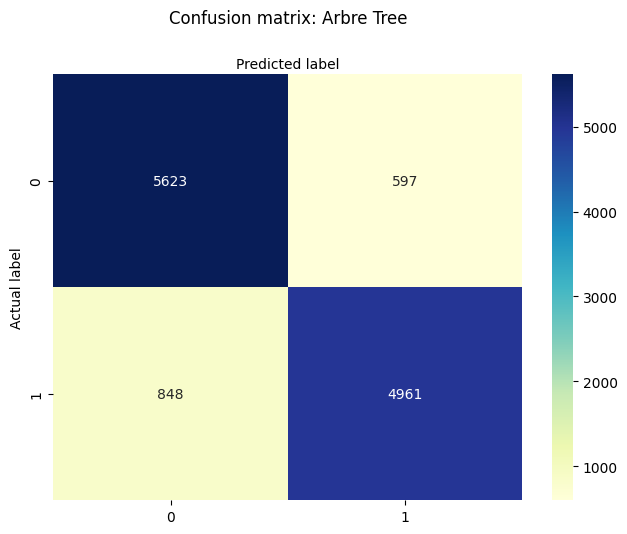

In [113]:
cnf_matrix = metrics.confusion_matrix(y_test, tree_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: Arbre Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')